In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ioeDashboard/diabetes_prediction_dataset.csv')

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
print(data['diabetes'].unique(),data['gender'].unique())

[0 1] ['Female' 'Male' 'Other']


In [6]:
data['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


In [7]:
data['smoking_history'].value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


In [8]:
# label_encoder = LabelEncoder()
# data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])
# data['gender'] = label_encoder.fit_transform(data['gender'])

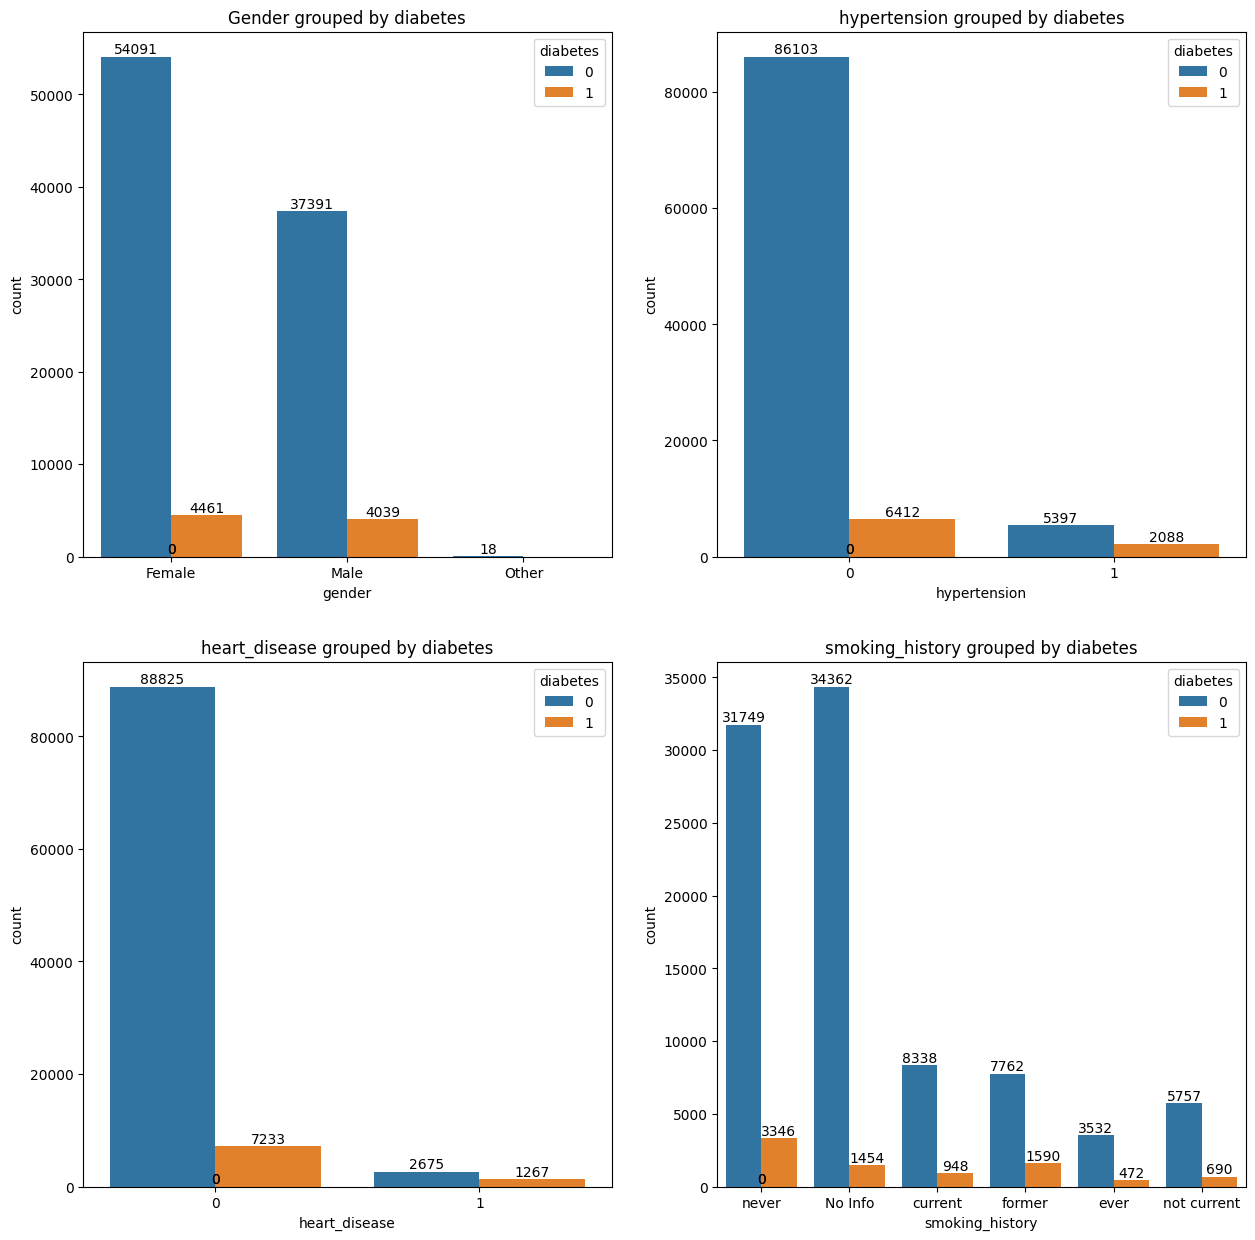

In [9]:
def add_plot(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', ((p.get_x() + p.get_width()/2), p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

fig1, axes = plt.subplots(2, 2, figsize=(15,15))

ax = sns.countplot(x='gender', hue='diabetes', data=data, ax=axes[0,0])
axes[0,0].set_title('Gender grouped by diabetes')
add_plot(ax)

ax = sns.countplot(x='hypertension', hue='diabetes', data=data, ax=axes[0,1])
axes[0,1].set_title('hypertension grouped by diabetes')
add_plot(ax)

ax = sns.countplot(x='heart_disease', hue='diabetes', data=data, ax=axes[1,0])
axes[1,0].set_title('heart_disease grouped by diabetes')
add_plot(ax)

ax = sns.countplot(x='smoking_history', hue='diabetes', data=data, ax=axes[1,1])
axes[1,1].set_title('smoking_history grouped by diabetes')
add_plot(ax)


# diabetes_counts = data['diabetes'].value_counts()

# axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
# axes[2, 1].set_title('Diabetes Distribution')
# axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# axes[2, 1].legend(title='Diabetes:', loc='upper right')

plt.show()


In [10]:
max_age = data['age'].max()
min_age = data['age'].min()
avg_age = data['age'].mean()

print(f"max_age: {max_age} min_age: {min_age} , avg_age: {avg_age} \n\n")

grouped_result = data.groupby(['gender','diabetes'])['age'].agg(['min', 'max', 'mean']).reset_index()

print(grouped_result)


max_age: 80.0 min_age: 0.08 , avg_age: 41.885856 


   gender  diabetes   min   max       mean
0  Female         0  0.08  80.0  40.935065
1  Female         1  4.00  80.0  60.993499
2    Male         0  0.08  80.0  38.934209
3    Male         1  3.00  80.0  60.894776
4   Other         0  7.00  55.0  29.555556


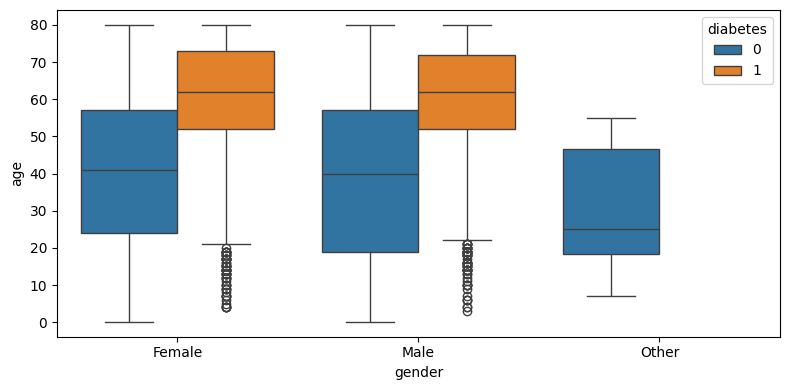

In [11]:
fig2 = plt.figure(figsize=(8,4))

sns.boxplot(x='gender', y='age', hue='diabetes', data=data)

plt.tight_layout()
plt.show()

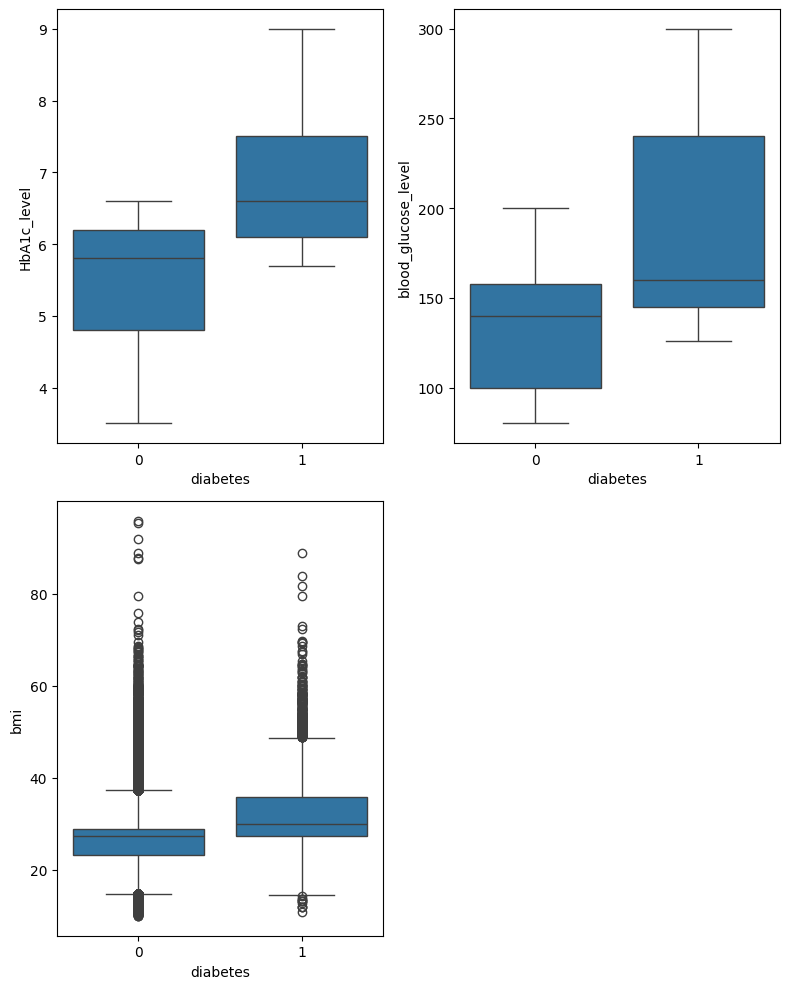

In [12]:
fig3, axes = plt.subplots(2,2, figsize=(8,10))

sns.boxplot(x='diabetes', y='HbA1c_level', data=data, ax=axes[0,0], )

sns.boxplot(x='diabetes', y='blood_glucose_level', data=data, ax=axes[0,1])

sns.boxplot(x='diabetes', y='bmi', data=data, ax=axes[1,0])

axes[1][1].remove()

plt.tight_layout()
plt.show()

In [13]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [14]:
data.duplicated().sum()

data = data.drop_duplicates()

data.duplicated().sum()

0

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
X = data.drop('diabetes',axis=1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_columns = ['gender', 'smoking_history']




In [17]:
# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Create pipelines for each model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease', 'bmi',
                                                   'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [18]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Print accuracy and classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using Seaborn heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


Random Forest Test Set Performance:
Accuracy: 0.9681747269890796
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.69      0.79      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



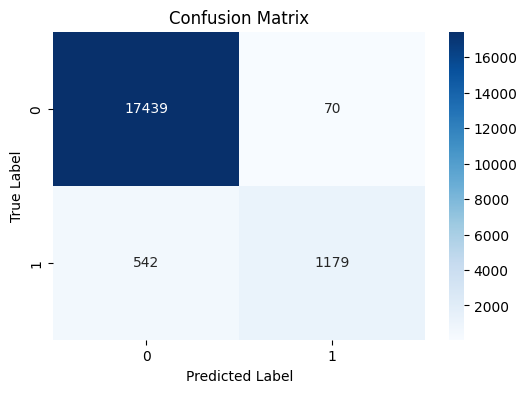


XGB Test Set Performance:
Accuracy: 0.9702548101924077
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.96      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.97      0.85      0.90     19230
weighted avg       0.97      0.97      0.97     19230



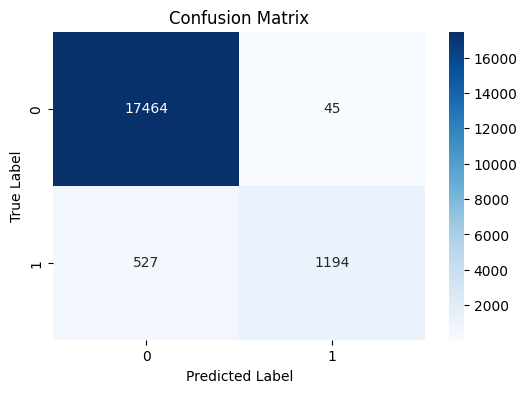


Decision Tree Test Set Performance:
Accuracy: 0.9493499739989599
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.71      0.74      0.72      1721

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



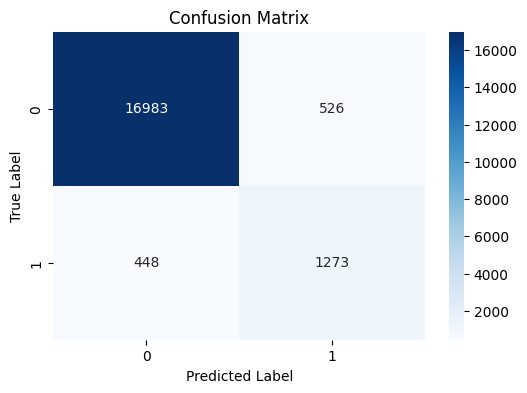

In [19]:
print("\nRandom Forest Test Set Performance:")
evaluate_model(rf_pipeline, X_test, y_test)

print("\nXGB Test Set Performance:")
evaluate_model(xgb_pipeline, X_test, y_test)

print("\nDecision Tree Test Set Performance:")
evaluate_model(dt_pipeline, X_test, y_test)

In [20]:
# Assuming xgb_pipeline is already defined

# Sample data point (replace with your actual data)
# Include values for gender and smoking_history
new_data = pd.DataFrame([[30, 0, 0, 25.0, 6.2, 140, 'Male', 'never']],  # Added 'Male' and 'never'
                       columns=['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender', 'smoking_history'])


# Make prediction on the sample data point
prediction = xgb_pipeline.predict(new_data)

# Print the prediction
print("Prediction:", prediction)

Prediction: [0]
